In [1]:
#import the required libraries.
import pandas as pd
import numpy as np
from numpy.linalg import norm
import math
import matplotlib.pyplot as plt
from numpy import nanmedian
import random
from kmodes.kmodes import KModes
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("responses.csv")

In [3]:
#fill the nan values using the medians
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.median()))

In [4]:
#used to find the nan count of attributes
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'Smoking': 8, 'Alcohol': 5, 'Punctuality': 2, 'Lying': 2, 'Achievements': 2, 'Gender': 6, 'Left - right handed': 3, 'Education': 1, 'Only child': 2, 'Village - town': 4, 'House - block of flats': 4}


In [5]:
def replace(col):
    #find the unique values
    un=pd.unique(df[col])
    j=1
    #dictionary used to map the categorical variables
    dict_1={}
    for i in un[:-1]:
        dict_1[i]=j
        j+=1
    # un[-1] has nan in it. Hence that must have a value of zero initially
    dict_1[un[-1]]=0   
    #print(dict_1)
    x=[]
    #list containing the integer values of the categorical variales
    for index,row in df[col].iteritems():
        x.append((dict_1[row])) 
    med=np.median(x)
    #the zero valued rows are replaced with the median
    for i in range (0,len(x)):
        if(x[i]==0):
            x[i]=int(med)
    # assign it to the dataframe
    df[col]=x
    
NaN_Col=['Smoking','Alcohol','Punctuality','Lying','Education']
for i in NaN_Col:
    replace(i)

In [6]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'Achievements': 2, 'Gender': 6, 'Left - right handed': 3, 'Only child': 2, 'Village - town': 4, 'House - block of flats': 4}


female    593
male      411
Name: Gender, dtype: int64
59.06374501992032 40.93625498007968


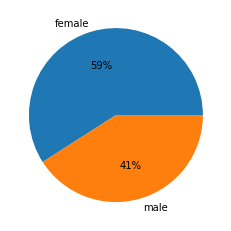

In [7]:
valcount=df.Gender.value_counts()
print(valcount)
noperc=(valcount['female']/(valcount['male']+valcount['female']))*100
yesperc=(valcount['male']/(valcount['male']+valcount['female']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['female','male'], autopct='%1.0f%%')
plt.show()

In [8]:
for index,row in df.Gender.iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=60):
            df.Gender.loc[index]='female'
        else:
            df.Gender.loc[index]='male'

C:\Users\anind\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


89.97020854021847 10.02979145978153


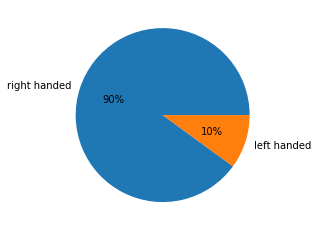

In [9]:
valcount=df['Left - right handed'].value_counts()
noperc=(valcount['right handed']/(valcount['right handed']+valcount['left handed']))*100
yesperc=(valcount['left handed']/(valcount['right handed']+valcount['left handed']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['right handed','left handed'], autopct='%1.0f%%')
plt.show()

In [10]:
for index,row in df['Left - right handed'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=90):
            df['Left - right handed'].loc[index]='right handed'
        else:
            df['Left - right handed'].loc[index]='left handed'

74.8015873015873 25.198412698412696


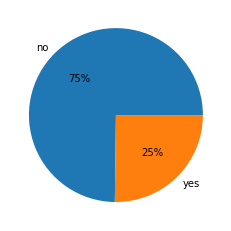

In [11]:
valcount=df['Only child'].value_counts()
noperc=(valcount['no']/(valcount['yes']+valcount['no']))*100
yesperc=(valcount['yes']/(valcount['yes']+valcount['no']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['no','yes'], autopct='%1.0f%%')
plt.show()

In [12]:
for index,row in df['Only child'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=75):
            df['Only child'].loc[index]='no'
        else:
            df['Only child'].loc[index]='yes'

29.721669980119287 70.27833001988071


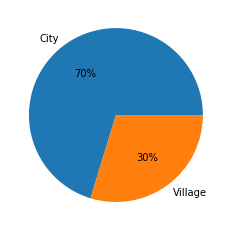

In [13]:
valcount=df['Village - town'].value_counts()
noperc=(valcount['village']/(valcount['village']+valcount['city']))*100
yesperc=(valcount['city']/(valcount['village']+valcount['city']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['City','Village'], autopct='%1.0f%%')
plt.show()

In [14]:
for index,row in df['Village - town'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=70):
            df['Village - town'].loc[index]='city'
        else:
            df['Village - town'].loc[index]='village'

40.85487077534791 59.14512922465208


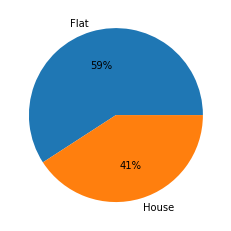

In [15]:
valcount=df['House - block of flats'].value_counts()
noperc=(valcount['house/bungalow']/(valcount['house/bungalow']+valcount['block of flats']))*100
yesperc=(valcount['block of flats']/(valcount['house/bungalow']+valcount['block of flats']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['Flat','House'], autopct='%1.0f%%')
plt.show()

In [16]:
for index,row in df['House - block of flats'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=60):
            df['House - block of flats'].loc[index]='block of flats'
        else:
            df['House - block of flats'].loc[index]='house/bungalow'

In [17]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'Achievements': 2}


In [18]:
# replacing 1 and 2 for binary variables
def replace1(col):
    un=pd.unique(df[col])
    j=1
    dict_1={}
    for i in un:
        dict_1[i]=j
        j+=1  
    #print(dict_1)
    x=[]
    for index,row in df[col].iteritems():
        x.append((dict_1[row])) 
    df[col]=x
    
NaN_Col=['Gender', 'Left - right handed', 'Only child', 'Village - town', 'House - block of flats']
for i in NaN_Col:
    replace1(i)

In [19]:
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.median()))

In [20]:
med1=np.nanmedian(df.Achievements)
for index,row in df.Achievements.iteritems():
    a=df.Achievements.isnull()
    for val in a:
        if(val == True):
            df.Achievements.loc[index]=med1           

C:\Users\anind\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{}


In [22]:
#multiple linear regression
X = pd.DataFrame(np.c_[df.iloc[:,31:73]])
y = df['Comedy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

lin_reg_mod = LinearRegression()

lin_reg_mod.fit(X_train, y_train)

pred = lin_reg_mod.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)
print(test_set_r2)


0.7677024984230187
0.08716886647295108


In [23]:
######################################################################################################################

In [4]:
# function to calculate the cosine similarity
def sim(a,b):
    cos_sim = np.dot(a, b)/(norm(a)*norm(b))
    return cos_sim

In [5]:
# agglomerative clustering based on centroid distance
def trainModelAndValidate(train,test):
    count=0
    # select the required columns
    per = pd.DataFrame(np.c_[train.iloc[:,31:73]])
    #kmodes clustering with initial cluster as 500
    km = KModes(n_clusters=500,max_iter=1000,init='Huang',n_init=2,
                n_jobs=-1)
    print("Cost of K clusters")
    m1 = km.fit(per)
    #print the cost of clustering 
    print("500 clusters:",m1.cost_)
    
    # reduce the clusters gradually till the cost is minimized
    mdl1 = m1.cluster_centroids_
    km1 = KModes(n_clusters=250,max_iter=1000,init='Huang',n_init=2,n_jobs=-1)
    m2 = km1.fit(mdl1)
    #print(m2.cluster_centroids_)
    print("250 clusters:",m2.cost_)
    
    mdl2 = m2.cluster_centroids_
    km2 = KModes(n_clusters=125,max_iter=1000,init='Huang',n_init=2,n_jobs=-1)
    m3= km2.fit(mdl2)
    #print(m3.cluster_centroids_)
    print("125 clusters:",m3.cost_)
    
    mdl3 = m3.cluster_centroids_
    km3 = KModes(n_clusters=62,max_iter=1000,init='Huang',n_init=2,n_jobs=-1)
    m4= km3.fit(mdl3)
    #print(m4.cluster_centroids_)
    print("62 clusters:",m4.cost_)

    mdl4 = m4.cluster_centroids_
    km4 = KModes(n_clusters=31,max_iter=1000,init='Huang',n_init=2,n_jobs=-1)
    m5 = km4.fit(mdl4)
    #print(m5.cluster_centroids_)
    print("31 clusters:",m5.cost_)

    mdl5 = m5.cluster_centroids_
    km5 = KModes(n_clusters=15,max_iter=1000,init='Huang',n_init=2,n_jobs=-1)
    m6 = km5.fit(mdl5)
    #print(m6.cluster_centroids_)
    print("15 clusters:",m6.cost_)
    
    mdl6 = m6.cluster_centroids_
    km6 = KModes(n_clusters=10,max_iter=1000,init='Cao',n_init=2,n_jobs=-1)
    m7 = km6.fit(mdl6)
    #print(m7.cluster_centroids_)
    print("10 clusters:",m7.cost_)
    
    mdl7 = m7.cluster_centroids_
    km7 = KModes(n_clusters=8,max_iter=1000,init='Cao',n_init=2,n_jobs=-1)
    m8 = km7.fit(mdl7)
    mfin_clust=m8.cluster_centroids_
    print("8 clusters:",m8.cost_)
    print()
    
    # The min cost is obtained when number of clusters = 8
    mfin=km7.fit_predict(per)
    fin=pd.DataFrame(mfin)
    #print(mfin_clust)
    
    
    # select the required columns
    df1=train.iloc[:,20:73]
    # add a new column which has the final classification
    df1['clusters']=mfin
    # In order to find the similarity between the users, we group the users who belong to the same cluster
    df_fin=df1.groupby(['clusters'])
    
    fin_0=df_fin.get_group(0)
    #print(np.std(fin_0['Horror']))

    fin_1=df_fin.get_group(1)
    #print(np.std(fin_1['Horror']))

    fin_2=df_fin.get_group(2)

    fin_3=df_fin.get_group(3)

    fin_4=df_fin.get_group(4)

    fin_5=df_fin.get_group(5)

    fin_6=df_fin.get_group(6)

    fin_7=df_fin.get_group(7)

    #convert the centroids of a cluster into a list
    mfin_clust=list(mfin_clust)
    
    for i in range((test.shape[0])):
        row_hobby=list(df.iloc[i,31:73])
        row_genre=list(df.iloc[i,20:31])
        
        # Euclidian distance between y and the centroid of each cluster
        # The calculated distances are stored in a dictionary with the key = cluster numbers
        distance={}

        for i in range(0,8):
            distance[i]=(math.sqrt(sum([(a - b) ** 2 for a, b in zip(mfin_clust[i], row_hobby)])))
        # minimum distance is calculated using the values of the dictionary 
        min_clust=min(distance, key=distance.get)
        #the user is classified into the cluster
        df_clust=df_fin.get_group(min_clust)
        #similarity for y and df_clust
        # drop the columns containing movie genre as the similarity between the users is calculated using the hobbies preferences
        df_clust2=df_clust.drop(['Horror','Romantic','Comedy','Thriller','Sci-fi','War','Fantasy/Fairy tales','Western','Animated',
                         'Documentary','Action'],axis=1)
        # insert a new column called index as each user needs to have one unique identity
        ind=list(range(0,len(df_clust2)))
        df_clust2.insert(0,'Index',ind)
        
        # add the index column to the dataframe
        df_clust2['Index']
        # dictinary to store the user-user similarity
        xz_dict={}
        for j in range(0,len(df_clust2)):
            xz=[]
            # the list contains the column header and the preferences of the jth row
            xz=list(df_clust2.iloc[j,:].items())
            #print(xz)
            xz1=[]
            # append only the preferences in a new list
            for i in range(1,43):
                xz1.append(xz[i][1])
            #print(xz1)
            simi=sim(xz1,row_hobby)
            #store the user similarity in a dictionary
            xz_dict[j]=simi
        # find 5 users who are most similar to the new user
        top_5=sorted(xz_dict, key=xz_dict.get, reverse=True)[:5]
        
        
        #dictionary used to store the rating for each genre based on user similarities
        fin_rec={}
        actual={}
        # for each genre
        for k in range(1,12):
            actual[k]=row_genre[k-1]
            user_rating=[]
            sum_sim=0
            rec=0
            # apped the ratings of the similar users into a list for a particular genre
            for i in top_5:
                user_rating.append(df_clust.iloc[i,k:k+1].item())
            # calculate the rating of the new user based on user-user similarity
            for i,j in zip(user_rating,xz_dict):
                rec=rec+(i*xz_dict[j])
                sum_sim=sum_sim+xz_dict[j]
            # store the rating in the dictionary created
            fin_rec[k]=rec/sum_sim
        #select the top 3 genres based on rating
        top_3=sorted(fin_rec, key=fin_rec.get, reverse=True)[:3]
        top_3_actual=sorted(actual, key=actual.get, reverse=True)[:3]
        # Thus recommend the genres to the user.
        for l in top_3:
            if l in top_3_actual:
                count+=1
    print("Accuracy",count/(3*test.shape[0]))
    return count/(3*test.shape[0])


In [7]:
kf = KFold(5, True, 1)
i=1
list_accuracy=[]
for train, test in kf.split(df):
    print("______________________________________________")
    print("Fold"+str(i))
    i+=1
    list_accuracy.append(trainModelAndValidate(df.iloc[train],df.iloc[test]))
print("______________________________________________")
print("Accuracy of the model is",(sum(list_accuracy)/len(list_accuracy))*100,"%")

______________________________________________
Fold1
Cost of K clusters
500 clusters: 6434.0
250 clusters: 5069.0
125 clusters: 2443.0
62 clusters: 1135.0
31 clusters: 510.0
15 clusters: 217.0
10 clusters: 41.0
8 clusters: 11.0

Accuracy 0.3316831683168317
______________________________________________
Fold2
Cost of K clusters
500 clusters: 6411.0
250 clusters: 5102.0
125 clusters: 2416.0
62 clusters: 1134.0
31 clusters: 479.0
15 clusters: 201.0
10 clusters: 49.0
8 clusters: 17.0

Accuracy 0.2871287128712871
______________________________________________
Fold3
Cost of K clusters
500 clusters: 6424.0
250 clusters: 5075.0
125 clusters: 2430.0
62 clusters: 1119.0
31 clusters: 497.0
15 clusters: 225.0
10 clusters: 47.0
8 clusters: 15.0

Accuracy 0.3333333333333333
______________________________________________
Fold4
Cost of K clusters
500 clusters: 6302.0
250 clusters: 5160.0
125 clusters: 2497.0
62 clusters: 1170.0
31 clusters: 535.0
15 clusters: 223.0
10 clusters: 44.0
8 clusters: 10.0

